# Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pickle
import seaborn as sns

In [2]:
clean = pd.read_csv('data.csv')

In [3]:
clean.head()

,Unnamed: 0,symbol,open,high,low,close,f_date,percent_change,volume,sector
0,0,ADBL,285.0,291.0,282.0,291.0,3/7/2023,2.500881,34653,COMBANK
1,1,ADBL,284.7,284.8,281.3,283.9,3/5/2023,1.646975,37017,COMBANK
2,2,ADBL,280.2,281.1,278.6,279.3,3/2/2023,-0.957447,17392,COMBANK
3,3,ADBL,289.4,289.4,281.0,282.0,3/1/2023,-1.052632,18727,COMBANK
4,4,ADBL,290.0,290.0,284.0,285.0,2/28/2023,0.000000,18954,COMBANK


In [4]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241024 entries, 0 to 241023
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      241024 non-null  int64  
 1   symbol          241024 non-null  object 
 2   open            241024 non-null  float64
 3   high            241024 non-null  float64
 4   low             241024 non-null  float64
 5   close           241024 non-null  float64
 6   f_date          241024 non-null  object 
 7   percent_change  241024 non-null  float64
 8   volume          241024 non-null  int64  
 9   sector          241024 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 18.4+ MB


In [5]:
most_common_symbol = clean['symbol'].value_counts()
most_common_symbol

symbol
EBL       2279
CHCL      2278
SCB       2276
SANIMA    2276
PCBL      2275
          ... 
SIKLES      71
ADLB        69
KLBS        64
NLO         31
BNL         13
Name: count, Length: 204, dtype: int64

In [6]:
user_choice1 = input(f"Enter the company stock you would like to check: ")

Enter the company stock you would like to check:  EBL


In [7]:
clean = clean[clean['symbol'] == user_choice1]
clean

,Unnamed: 0,symbol,open,high,low,close,f_date,percent_change,volume,sector
4547,4547,EBL,500.0,509.0,499.0,505.5,3/7/2023,1.100000,25805,COMBANK
4548,4548,EBL,505.0,505.1,495.1,500.0,3/5/2023,-0.596421,23016,COMBANK
4549,4549,EBL,505.0,510.0,500.0,503.0,3/2/2023,-1.178782,26744,COMBANK
4550,4550,EBL,506.3,515.0,506.3,509.0,3/1/2023,-1.356589,15985,COMBANK
4551,4551,EBL,519.9,519.9,508.0,516.0,2/28/2023,0.781250,19371,COMBANK
...,...,...,...,...,...,...,...,...,...,...
6821,6821,EBL,1623.0,1615.0,1600.0,1603.0,3/18/2013,-1.230000,4041,COMBANK
6822,6822,EBL,1660.0,1650.0,1610.0,1623.0,3/17/2013,-2.230000,7080,COMBANK
6823,6823,EBL,1662.0,1729.0,1640.0,1660.0,3/14/2013,-0.120000,6609,COMBANK
6824,6824,EBL,1598.0,1662.0,1610.0,1662.0,3/13/2013,4.010000,4679,COMBANK


In [8]:
# duplicates in f_date
duplicates = clean[clean.duplicated(subset='f_date', keep=False)]

# drop duplicates on f_date
clean = clean.drop_duplicates(subset='f_date')

In [9]:
clean.loc[:, 'f_date'] = pd.to_datetime(clean['f_date'])
clean['f_date'].info()
clean.head()

<class 'pandas.core.series.Series'>
Index: 2279 entries, 4547 to 6825
Series name: f_date
Non-Null Count  Dtype 
--------------  ----- 
2279 non-null   object
dtypes: object(1)
memory usage: 35.6+ KB


,Unnamed: 0,symbol,open,high,low,close,f_date,percent_change,volume,sector
4547,4547,EBL,500.0,509.0,499.0,505.5,2023-03-07 00:00:00,1.100000,25805,COMBANK
4548,4548,EBL,505.0,505.1,495.1,500.0,2023-03-05 00:00:00,-0.596421,23016,COMBANK
4549,4549,EBL,505.0,510.0,500.0,503.0,2023-03-02 00:00:00,-1.178782,26744,COMBANK
4550,4550,EBL,506.3,515.0,506.3,509.0,2023-03-01 00:00:00,-1.356589,15985,COMBANK
4551,4551,EBL,519.9,519.9,508.0,516.0,2023-02-28 00:00:00,0.781250,19371,COMBANK


In [10]:
clean = clean.set_index('f_date')
clean.index = pd.to_datetime(clean.index)
all_dates = pd.date_range(start=clean.index.min(), end=clean.index.max(), freq='D')
clean = clean.reindex(all_dates)
clean = clean.infer_objects() # called, but still future warning is shown
clean

/opt/miniconda3/envs/ml/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Unnamed: 0,symbol,open,high,low,close,percent_change,volume,sector
2013-03-11,6825.0,EBL,1589.0,1618.0,1588.0,1598.0,0.570000,4034.0,COMBANK
2013-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-13,6824.0,EBL,1598.0,1662.0,1610.0,1662.0,4.010000,4679.0,COMBANK
2013-03-14,6823.0,EBL,1662.0,1729.0,1640.0,1660.0,-0.120000,6609.0,COMBANK
2013-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-05,4548.0,EBL,505.0,505.1,495.1,500.0,-0.596421,23016.0,COMBANK
2023-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
clean = clean.drop(["Unnamed: 0", "sector", "percent_change"], axis = 1)

In [12]:
clean.head()

,symbol,open,high,low,close,volume
2013-03-11,EBL,1589.0,1618.0,1588.0,1598.0,4034.0
2013-03-12,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-13,EBL,1598.0,1662.0,1610.0,1662.0,4679.0
2013-03-14,EBL,1662.0,1729.0,1640.0,1660.0,6609.0
2013-03-15,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
clean['avg'] = clean[['open', 'high', 'low', 'close']].mean(axis = 1)
clean.head()

,symbol,open,high,low,close,volume,avg
2013-03-11,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.25
2013-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-13,EBL,1598.0,1662.0,1610.0,1662.0,4679.0,1633.00
2013-03-14,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.75
2013-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
clean = clean.ffill()
clean.head()

,symbol,open,high,low,close,volume,avg
2013-03-11,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.25
2013-03-12,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.25
2013-03-13,EBL,1598.0,1662.0,1610.0,1662.0,4679.0,1633.00
2013-03-14,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.75
2013-03-15,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.75


In [15]:
clean.reset_index(inplace=True)

In [16]:
clean.head()

,index,symbol,open,high,low,close,volume,avg
0,2013-03-11,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.25
1,2013-03-12,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.25
2,2013-03-13,EBL,1598.0,1662.0,1610.0,1662.0,4679.0,1633.00
3,2013-03-14,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.75
4,2013-03-15,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.75


In [17]:
clean.rename(columns={'index': 'f_date'}, inplace=True)
clean

,f_date,symbol,open,high,low,close,volume,avg
0,2013-03-11,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.250
1,2013-03-12,EBL,1589.0,1618.0,1588.0,1598.0,4034.0,1598.250
2,2013-03-13,EBL,1598.0,1662.0,1610.0,1662.0,4679.0,1633.000
3,2013-03-14,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.750
4,2013-03-15,EBL,1662.0,1729.0,1640.0,1660.0,6609.0,1672.750
...,...,...,...,...,...,...,...,...
3644,2023-03-03,EBL,505.0,510.0,500.0,503.0,26744.0,504.500
3645,2023-03-04,EBL,505.0,510.0,500.0,503.0,26744.0,504.500
3646,2023-03-05,EBL,505.0,505.1,495.1,500.0,23016.0,501.300
3647,2023-03-06,EBL,505.0,505.1,495.1,500.0,23016.0,501.300


# Creation of Visibility Graph

In [18]:
rows = []

window_size = int(input("Enter the sliding window days: "))  # use a any-day window for demonstration
for i in range(len(clean) - window_size):
    
    # Extract 'avg' features
    avg_features = clean['avg'].iloc[i:i+window_size].values
    
    # Extract 'volume' features
    volume_features = clean['volume'].iloc[i:i+window_size].values

    # Extract 'open' features
    open_features = clean['open'].iloc[i:i+window_size].values

    # Extract 'high' features
    high_features = clean['high'].iloc[i:i+window_size].values

    # Extract 'low' features
    low_features = clean['low'].iloc[i:i+window_size].values
    
    # Extract 'close' features
    close_features = clean['close'].iloc[i:i+window_size].values

    # Define the target as the 'avg' value on the future day
    # target = clean['avg'].iloc[i + window_size]

    # Combine the features and target
    rows.append(list(avg_features) + list(volume_features) + list(open_features) + 
                list(high_features)+ list(low_features) + list(close_features))

Enter the sliding window days:  20


In [19]:
# rows

In [20]:
columns = [f'avg_{i+1}' for i in range(window_size)] + [f'volume_{i+1}' for i in range(window_size)] + [f'open_{i+1}' for i in range(window_size)] + [f'high_{i+1}' for i in range(window_size)] + [f'low_{i+1}' for i in range(window_size)] + [f'close_{i+1}' for i in range(window_size)]
data = pd.DataFrame(rows, columns = columns)
print(data)

         avg_1     avg_2     avg_3     avg_4     avg_5     avg_6     avg_7  \
0     1598.250  1598.250  1633.000  1672.750  1672.750  1672.750  1635.750   
1     1598.250  1633.000  1672.750  1672.750  1672.750  1635.750  1610.250   
2     1633.000  1672.750  1672.750  1672.750  1635.750  1610.250  1609.500   
3     1672.750  1672.750  1672.750  1635.750  1610.250  1609.500  1608.500   
4     1672.750  1672.750  1635.750  1610.250  1609.500  1608.500  1593.500   
...        ...       ...       ...       ...       ...       ...       ...   
3624   546.750   539.500   539.500   526.725   524.500   518.075   518.075   
3625   539.500   539.500   526.725   524.500   518.075   518.075   518.075   
3626   539.500   526.725   524.500   518.075   518.075   518.075   518.075   
3627   526.725   524.500   518.075   518.075   518.075   518.075   515.300   
3628   524.500   518.075   518.075   518.075   518.075   515.300   515.300   

         avg_8     avg_9    avg_10  ...  close_11  close_12  cl

In [21]:
# data['volume_2'] # verification of existence

In [22]:
data.head()

,avg_1,avg_2,avg_3,avg_4,avg_5,avg_6,avg_7,avg_8,avg_9,avg_10,...,close_11,close_12,close_13,close_14,close_15,close_16,close_17,close_18,close_19,close_20
0,1598.25,1598.25,1633.00,1672.75,1672.75,1672.75,1635.75,1610.25,1609.5,1608.5,...,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0
1,1598.25,1633.00,1672.75,1672.75,1672.75,1635.75,1610.25,1609.50,1608.5,1593.5,...,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0
2,1633.00,1672.75,1672.75,1672.75,1635.75,1610.25,1609.50,1608.50,1593.5,1593.5,...,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0
3,1672.75,1672.75,1672.75,1635.75,1610.25,1609.50,1608.50,1593.50,1593.5,1593.5,...,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0
4,1672.75,1672.75,1635.75,1610.25,1609.50,1608.50,1593.50,1593.50,1593.5,1571.0,...,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,1572.0


In [23]:
column_prefix = input("Enter the field you would like to explore:\n close, open, high, avg, volume, low: \n")
column_names = [f'{column_prefix}_{i}' for i in range(1, window_size + 1)]
print(data[column_names])

Enter the field you would like to explore:
 close, open, high, avg, volume, low: 
 close


      close_1  close_2  close_3  close_4  close_5  close_6  close_7  close_8  \
0      1598.0   1598.0   1662.0   1660.0   1660.0   1660.0   1623.0   1603.0   
1      1598.0   1662.0   1660.0   1660.0   1660.0   1623.0   1603.0   1610.0   
2      1662.0   1660.0   1660.0   1660.0   1623.0   1603.0   1610.0   1600.0   
3      1660.0   1660.0   1660.0   1623.0   1603.0   1610.0   1600.0   1592.0   
4      1660.0   1660.0   1623.0   1603.0   1610.0   1600.0   1592.0   1592.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3624    550.0    532.0    532.0    526.9    524.0    517.0    517.0    517.0   
3625    532.0    532.0    526.9    524.0    517.0    517.0    517.0    517.0   
3626    532.0    526.9    524.0    517.0    517.0    517.0    517.0    513.0   
3627    526.9    524.0    517.0    517.0    517.0    517.0    513.0    513.0   
3628    524.0    517.0    517.0    517.0    517.0    513.0    513.0    520.0   

      close_9  close_10  close_11  clos

In [24]:
from tqdm import tqdm  # for progress tracking
data[column_names]

,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_11,close_12,close_13,close_14,close_15,close_16,close_17,close_18,close_19,close_20
0,1598.0,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0
1,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0
2,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0
3,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0
4,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,1572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,550.0,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0
3625,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0
3626,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0
3627,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0,500.0


In [25]:
data[column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   close_1   3629 non-null   float64
 1   close_2   3629 non-null   float64
 2   close_3   3629 non-null   float64
 3   close_4   3629 non-null   float64
 4   close_5   3629 non-null   float64
 5   close_6   3629 non-null   float64
 6   close_7   3629 non-null   float64
 7   close_8   3629 non-null   float64
 8   close_9   3629 non-null   float64
 9   close_10  3629 non-null   float64
 10  close_11  3629 non-null   float64
 11  close_12  3629 non-null   float64
 12  close_13  3629 non-null   float64
 13  close_14  3629 non-null   float64
 14  close_15  3629 non-null   float64
 15  close_16  3629 non-null   float64
 16  close_17  3629 non-null   float64
 17  close_18  3629 non-null   float64
 18  close_19  3629 non-null   float64
 19  close_20  3629 non-null   float64
dtypes: float64(20)
memory usage: 5

In [26]:
column_names

['close_1',
 'close_2',
 'close_3',
 'close_4',
 'close_5',
 'close_6',
 'close_7',
 'close_8',
 'close_9',
 'close_10',
 'close_11',
 'close_12',
 'close_13',
 'close_14',
 'close_15',
 'close_16',
 'close_17',
 'close_18',
 'close_19',
 'close_20']

In [27]:
data[column_names].values

array([[1598. , 1598. , 1662. , ..., 1575. , 1575. , 1575. ],
       [1598. , 1662. , 1660. , ..., 1575. , 1575. , 1544. ],
       [1662. , 1660. , 1660. , ..., 1575. , 1544. , 1545. ],
       ...,
       [ 532. ,  526.9,  524. , ...,  503. ,  503. ,  503. ],
       [ 526.9,  524. ,  517. , ...,  503. ,  503. ,  500. ],
       [ 524. ,  517. ,  517. , ...,  503. ,  500. ,  500. ]])

In [28]:
# function to create visibility graph from a larger window

def for_graph(row):
    selected_for_now = row[column_names].values
    G = nx.visibility_graph(selected_for_now)

    # mapping = {i: val for i, val in enumerate(selected_for_now)} # provides values of rows instead of using indices
    # G = nx.relabel_nodes(G, mapping) # mapping indices to rows
    # G.remove_edges_from(nx.selfloop_edges(G)) # removing self loops as they provide no info, maybe noise
    
    return G

jati_lekhdaa_ni_huncha = 100

In [29]:
# function to process data in batches to avoid overwhelming memory (i have only 8GB RAM and 128MB VRAM)

def process_in_batches(df, batch_size = jati_lekhdaa_ni_huncha):
    
    # an empty list to store visibility graphs
    visibility_graphs = []
    
    # process the DataFrame in batches
    num_batches = len(df) // batch_size + 1 # number of batches given in integer
    
    for i in tqdm(range(num_batches)):
        batch_df = df.iloc[i * batch_size : (i + 1) * batch_size]
        
        # generate graphs for the current batch
        batch_graphs = [for_graph(row) for _, row in batch_df.iterrows()]
        visibility_graphs.extend(batch_graphs)
    
    return visibility_graphs

In [30]:
# generating visibility graphs for the entire dataset (in batches)
visibility_graphs = process_in_batches(data, batch_size = jati_lekhdaa_ni_huncha)

100%|███████████████████████████████████████████| 37/37 [00:04<00:00,  7.73it/s]


In [31]:
# save visibility graphs for future use (serialization)
with open('visibility_graphs.pkl', 'wb') as f:
    pickle.dump(visibility_graphs, f)

In [32]:
len(visibility_graphs)

3629

In [33]:
#visibility_graphs

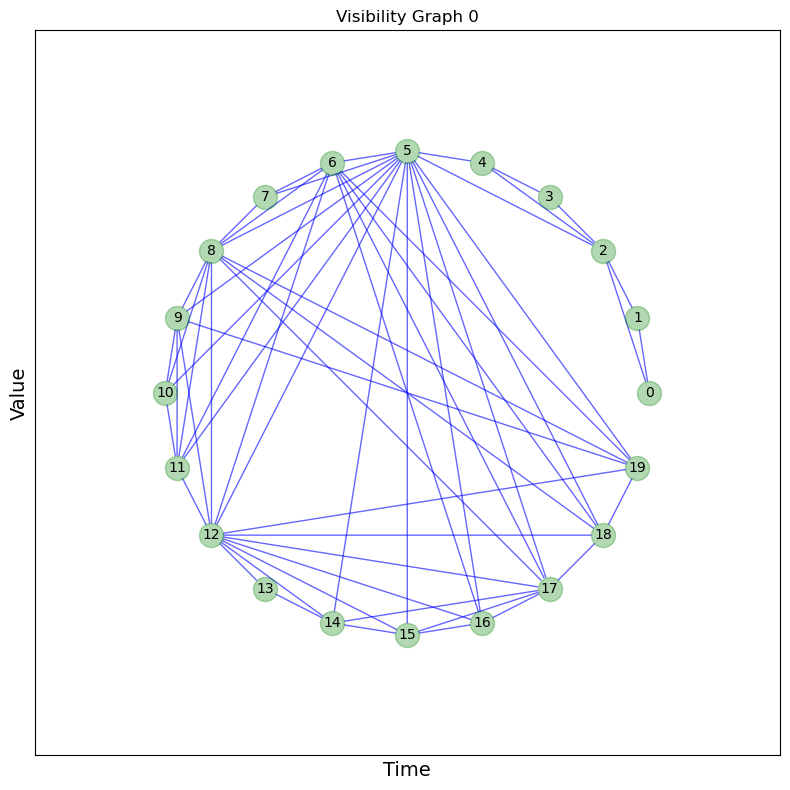

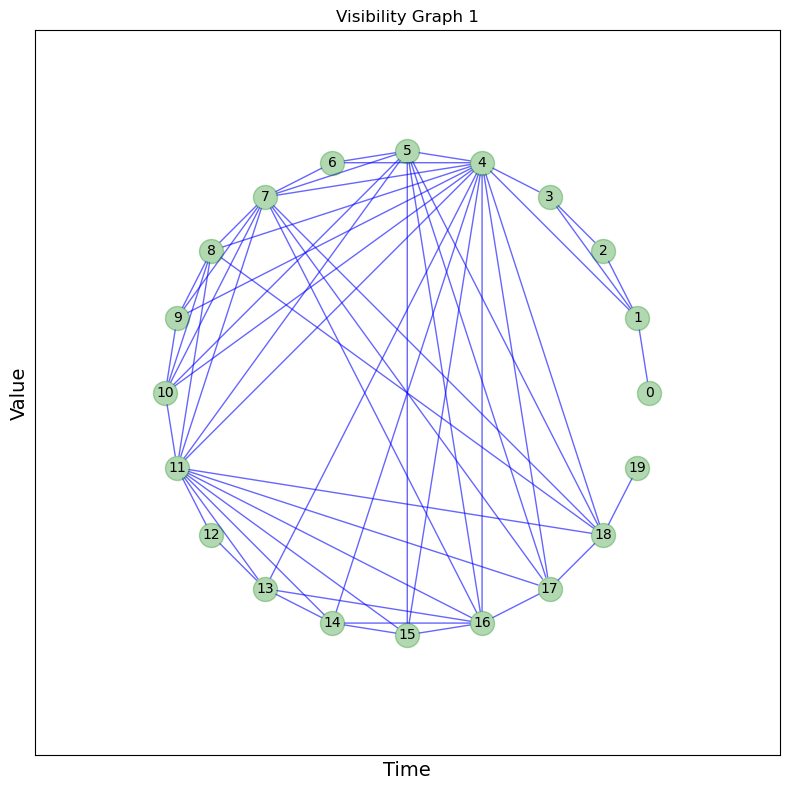

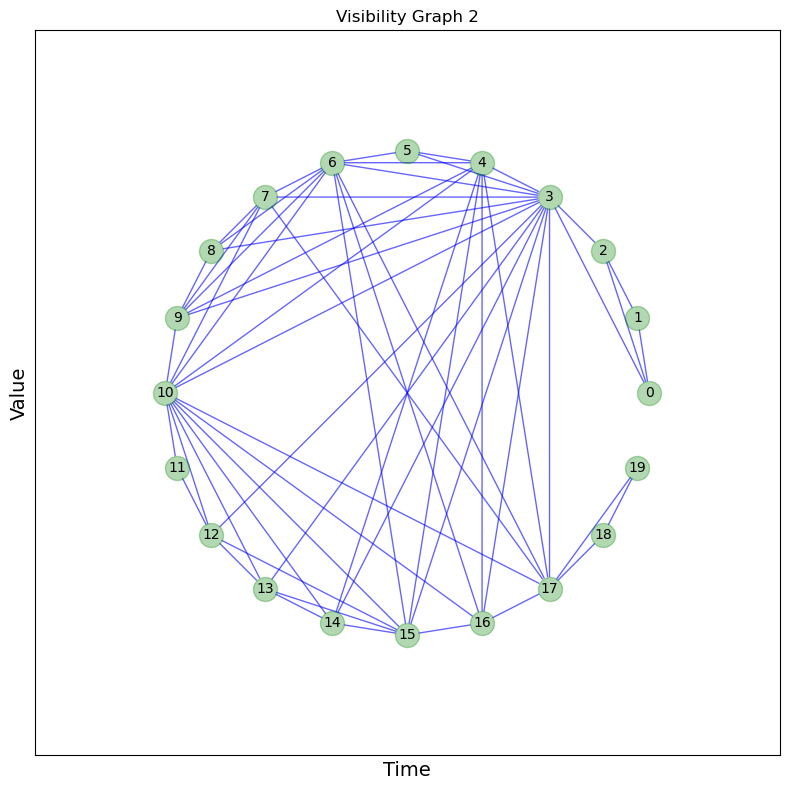

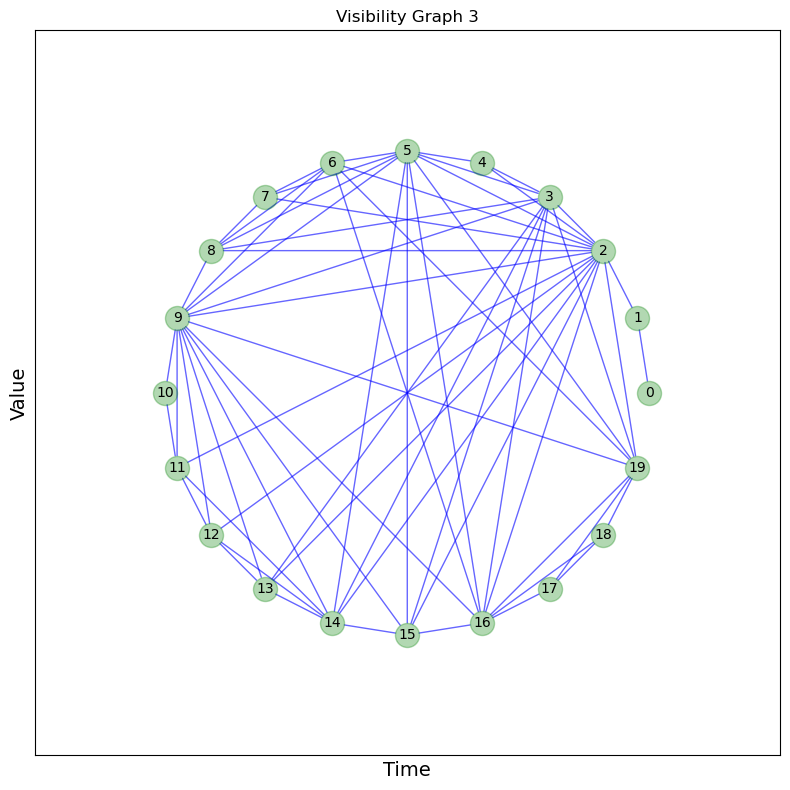

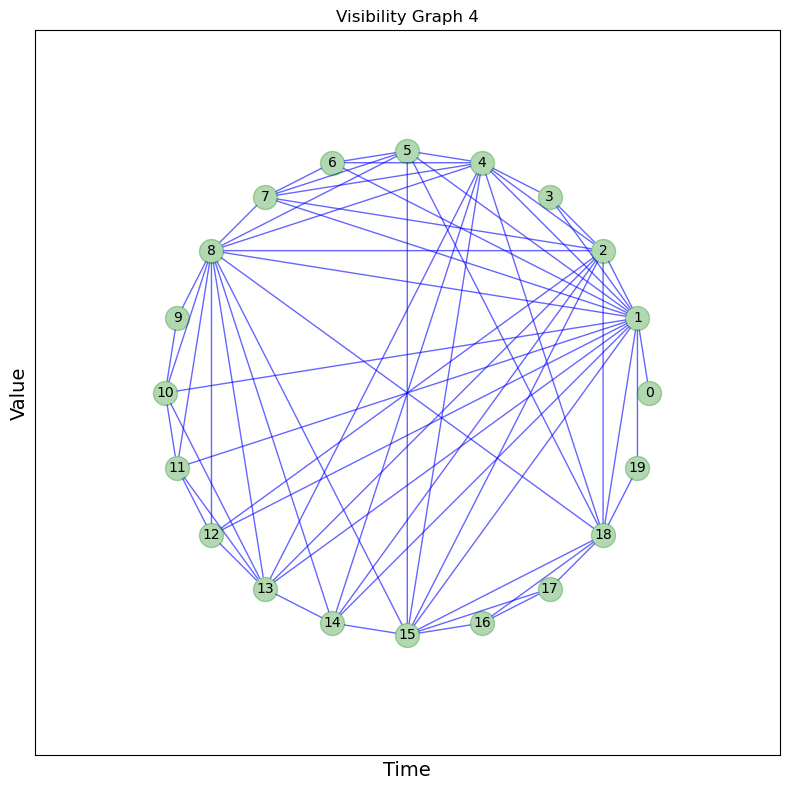

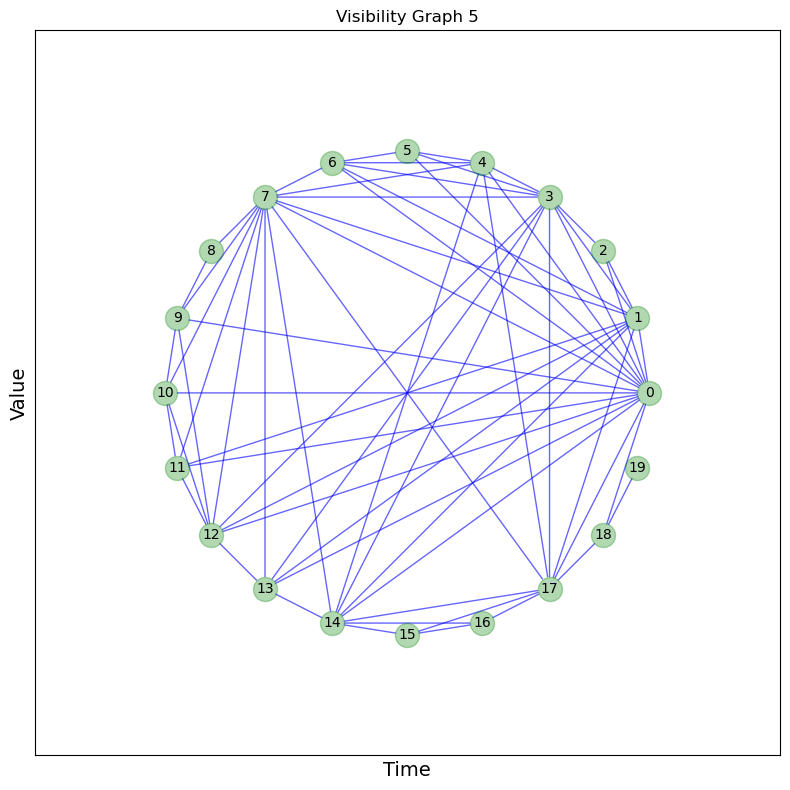

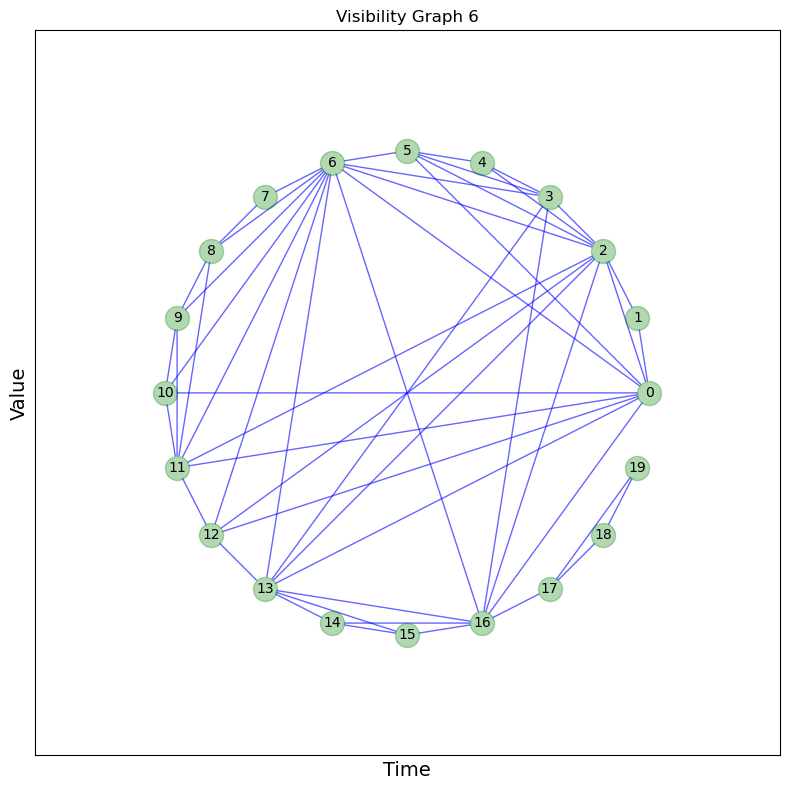

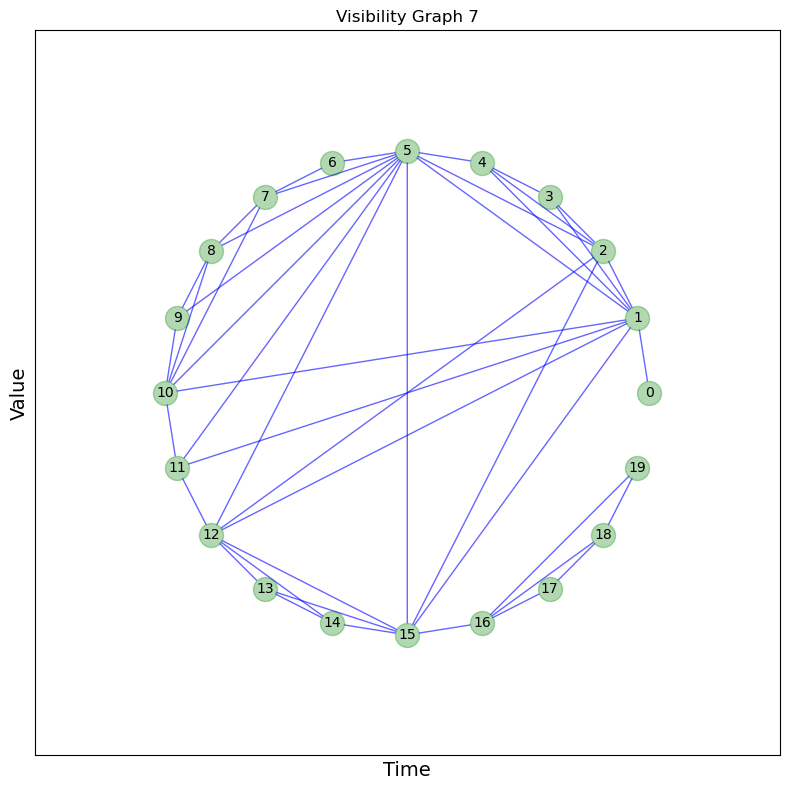

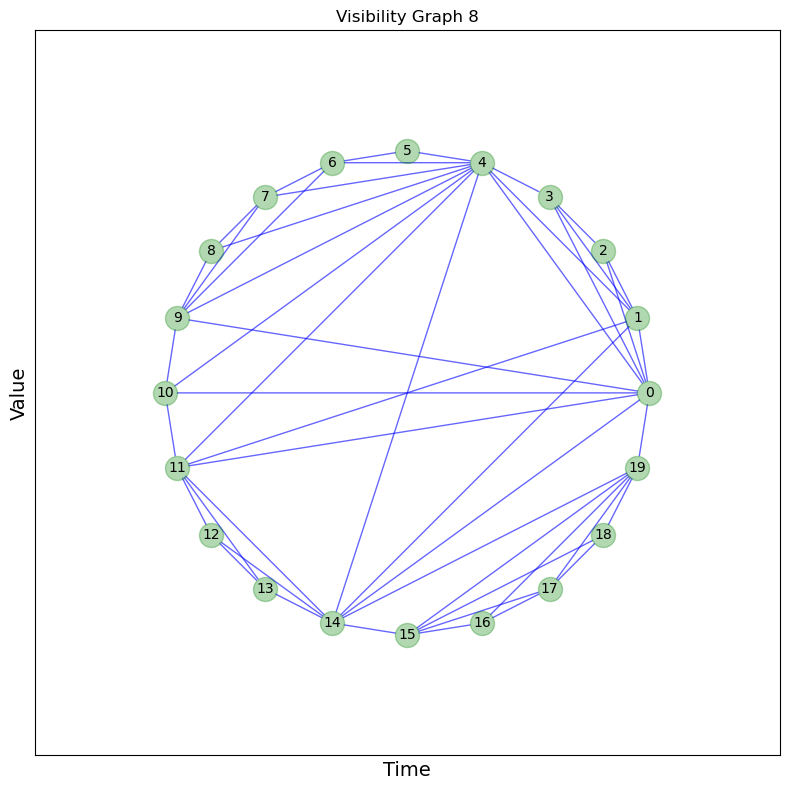

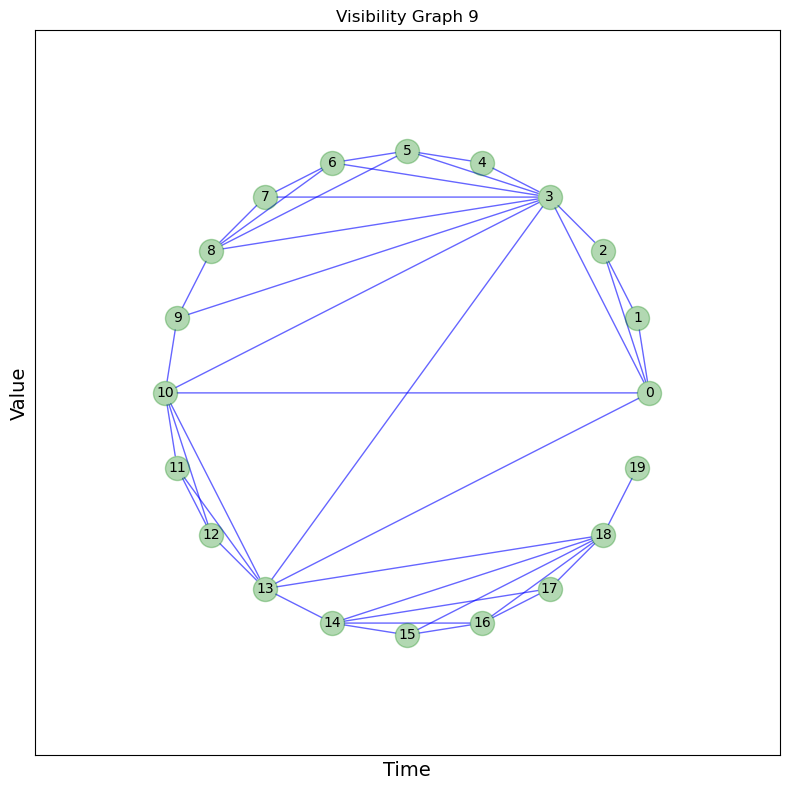

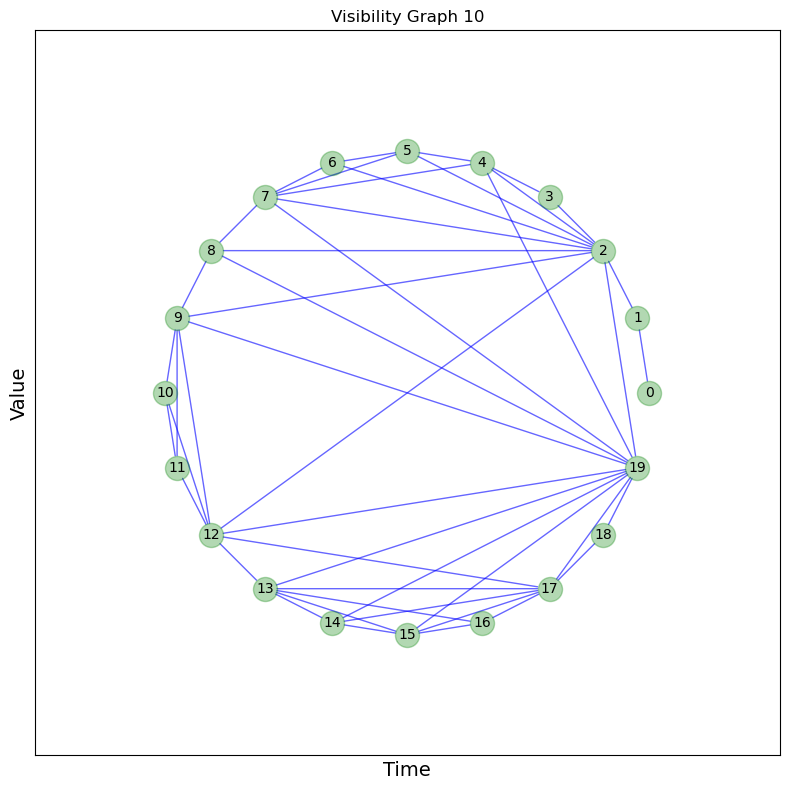

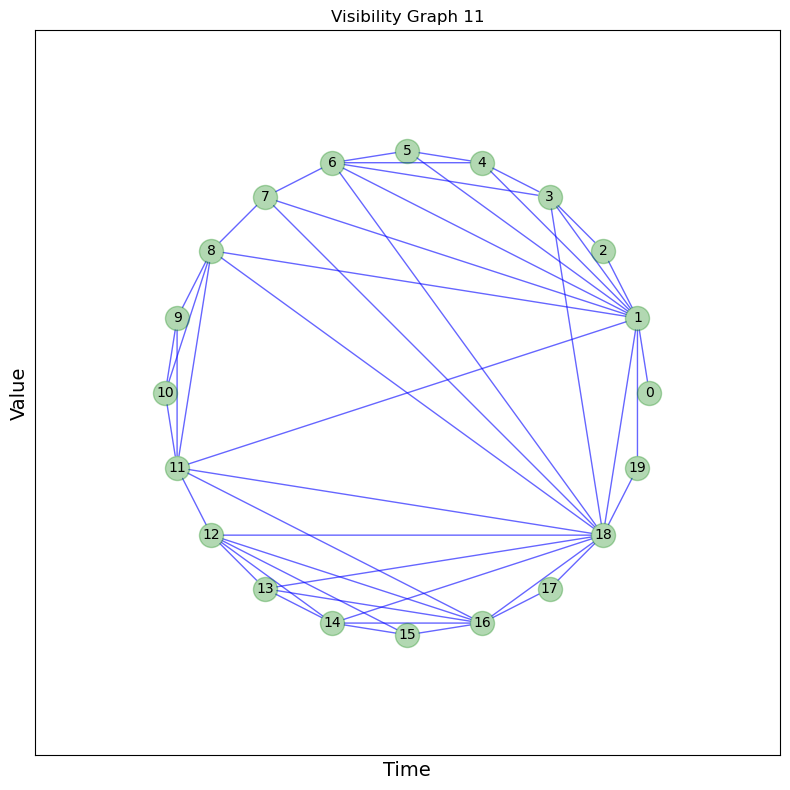

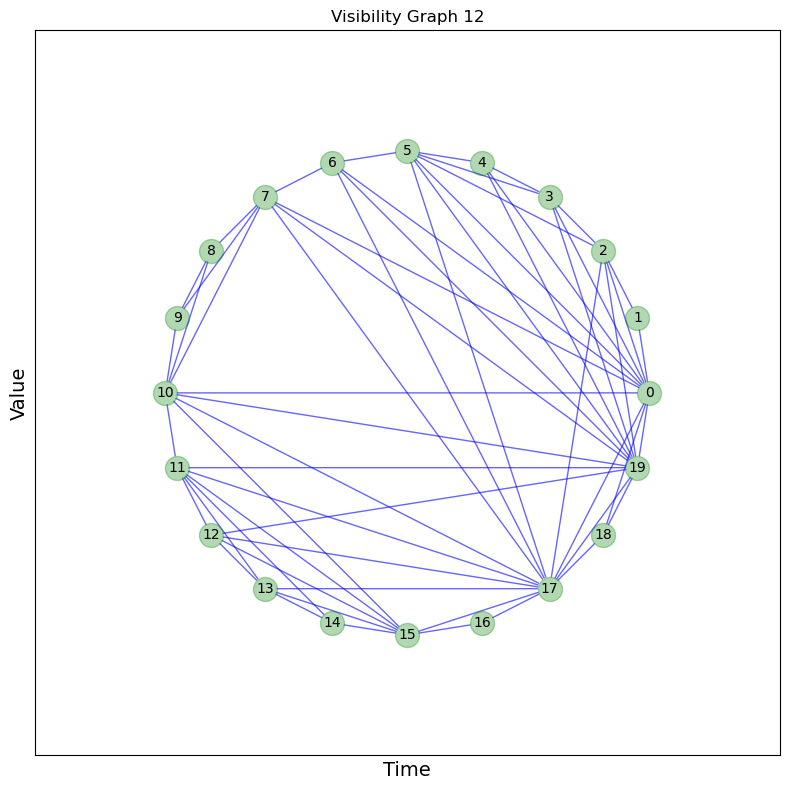

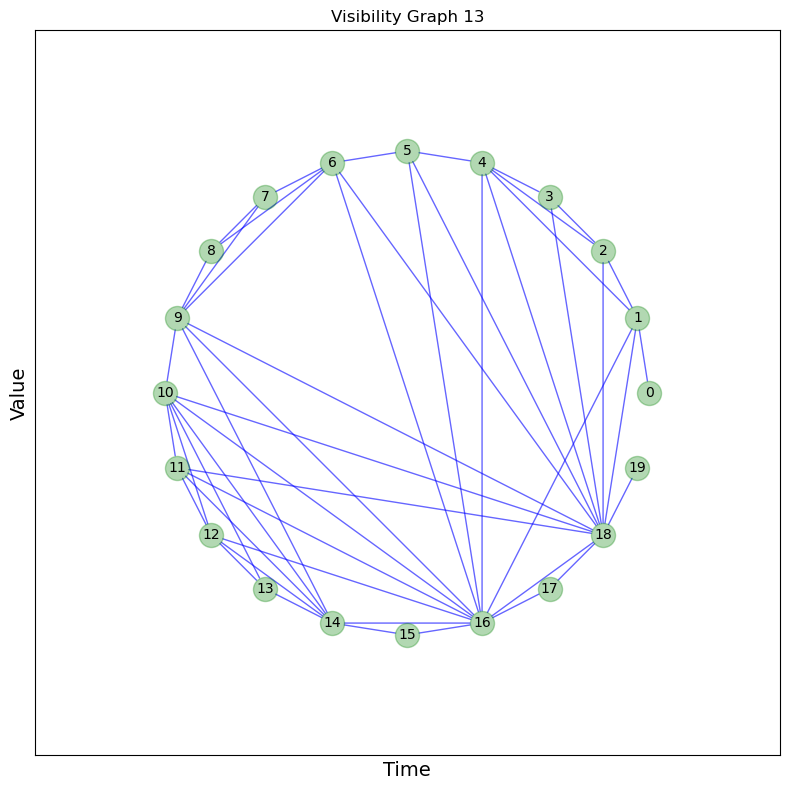

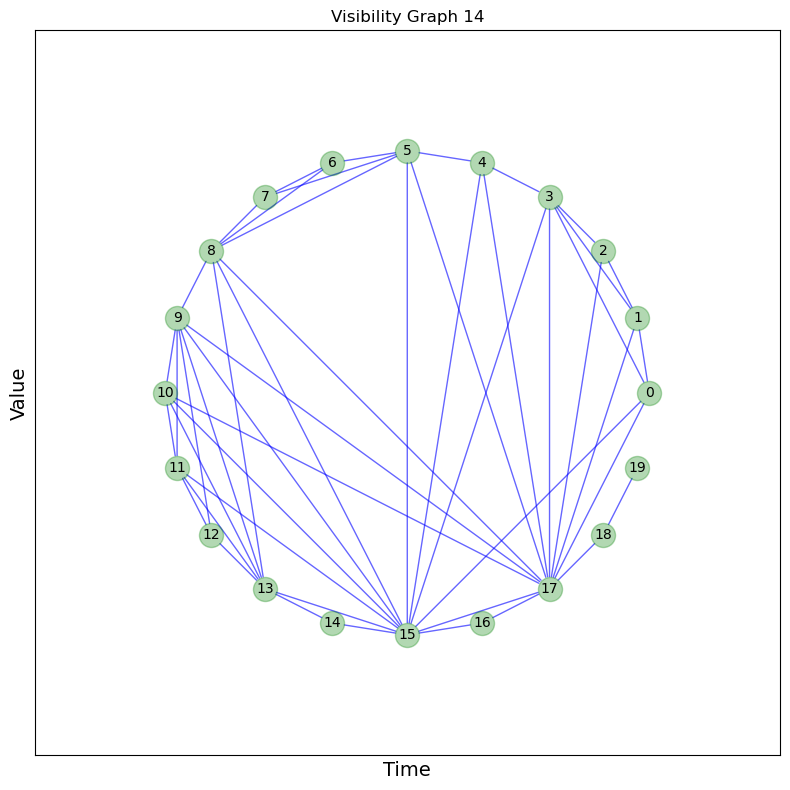

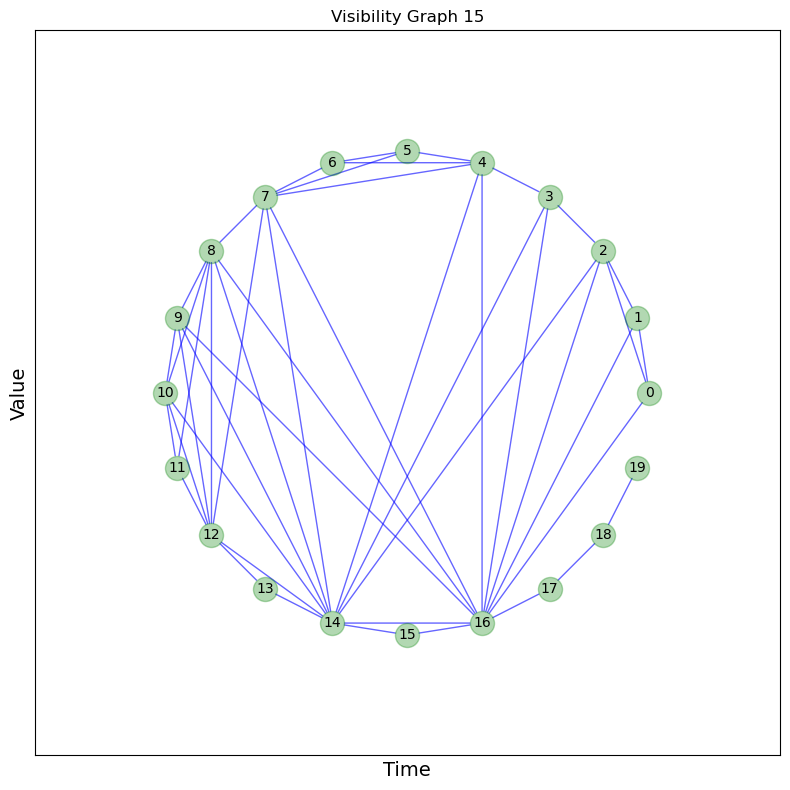

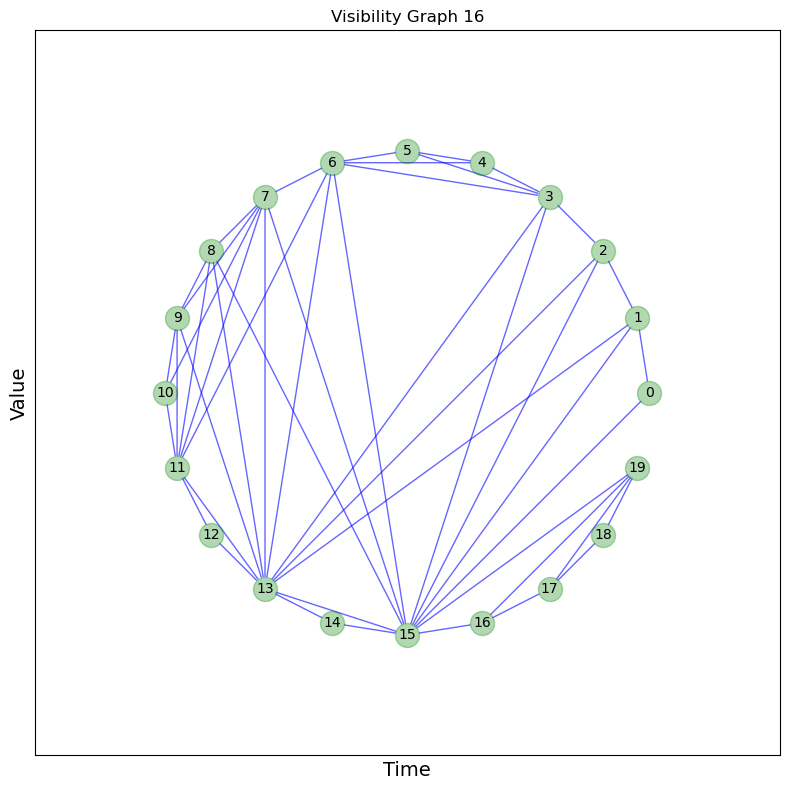

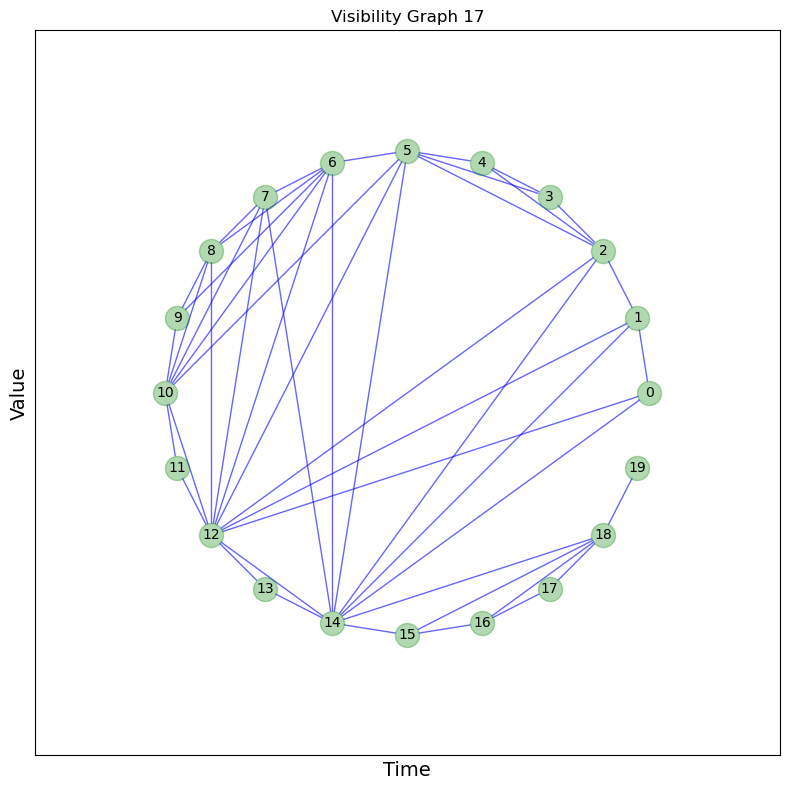

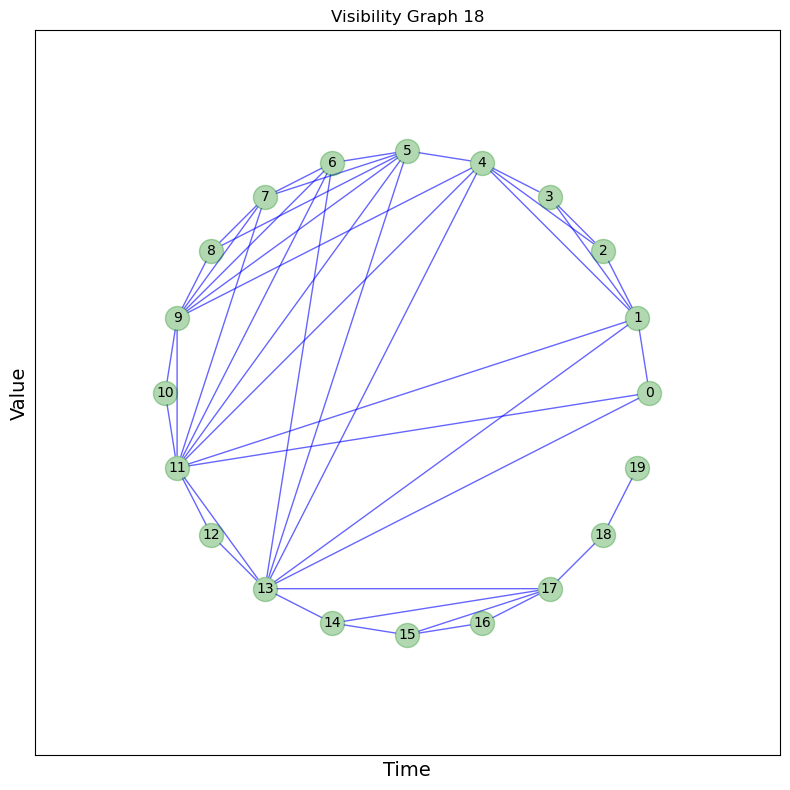

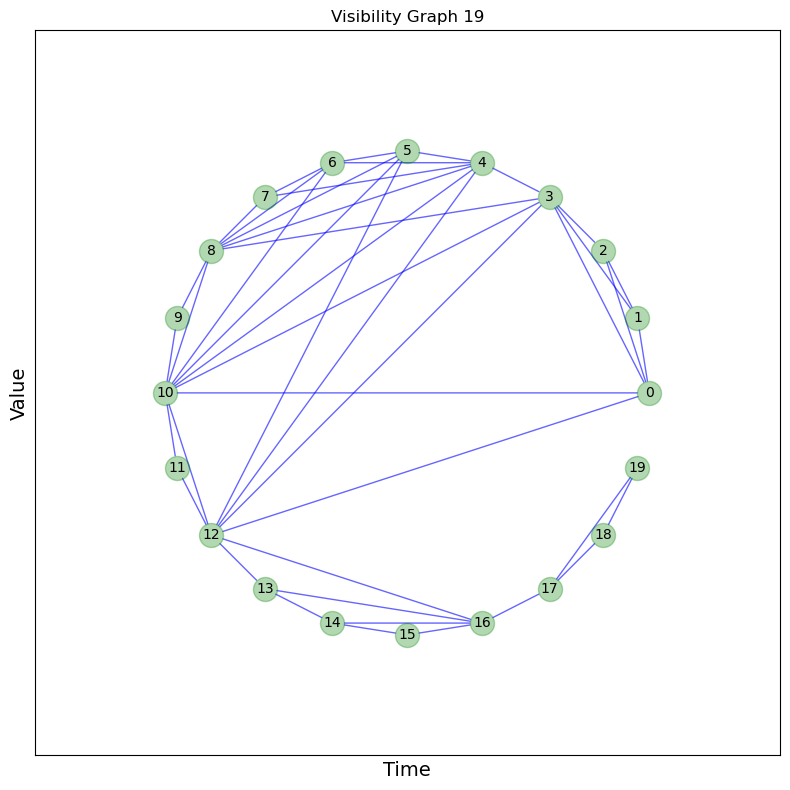

In [34]:
sampled_graphs = visibility_graphs[:20] # this is to print the graphs serially, right now it prints from 0 to 4
# to plot the sampled graphs (all of them: [:5] replaced by "len(visibility_graphs)"))

for i, G in enumerate(sampled_graphs):
    
    pos = nx.circular_layout(G)
    # pos = nx.shell_layout(G)
    # pos = nx.spring_layout(G, k = 0.8, iterations = 50)
        
    layout_params = {"pos": {j: (j, v) for j, v in enumerate(G.nodes())}}
    
    plt.figure(figsize=(8, 8))
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Value", fontsize = 14)
    plt.margins(0.20)

    nx.draw_networkx_nodes(G, pos, alpha = 0.3, node_size = 300, node_color = 'green')
    nx.draw_networkx_labels(G, pos, font_size = 10, font_color = 'black', font_weight = 'normal')
    nx.draw_networkx_edges(G, pos, alpha = 0.6, width = 1, edge_color='blue', style = 'solid', arrows = True, arrowstyle = '-')

    plt.title(f"Visibility Graph {i}", fontsize = 12)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    plt.close()  # close the figure after displaying it

In [35]:
labels = nx.get_node_attributes(G, "value") # last graph row's value
# labels

# Classifying the Feature

In [36]:
# harek row in data[column_names] ko laagi euta graph banayeko cha
# avg_1 column maa last 20 values hudaina
# avg_20 column maa first 20 values hudaina

# tara day 1 ko average "avg_1" ley diyeko cha AND day 20 ko average "avg_20" ley diyeko cha
# first row ko day 20 ko average: avg_20 ko thyakka tala day 21 ko average: "avg_21" huncha (if you know how sliding window works)
# so aba class banaudaa day 21 ko day 20 ko comparison maa badyo ki nai ta? tyo chai label gareko
# badyo = 2, same = 1, ghatyo = 0
# ani tei anusaar, row 0 (yes 0, first row) by the value of day_21 chai will be labeled as 2, 1, or 0 ani tyo row tyo class ma paryo
# either badney class maa, equal class maa, or ghatney class maa

In [37]:
work_on = data[column_names]
work_on

,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,close_11,close_12,close_13,close_14,close_15,close_16,close_17,close_18,close_19,close_20
0,1598.0,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0
1,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0
2,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0
3,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0
4,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,1572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,550.0,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0
3625,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0
3626,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0
3627,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0,500.0


In [38]:
work_on.loc[:, ['class']] = 0  # initialize the 'class' column with 0
work_on.head()

,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,...,close_12,close_13,close_14,close_15,close_16,close_17,close_18,close_19,close_20,class
0,1598.0,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,...,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,0
1,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,...,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,0
2,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,...,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,0
3,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,...,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,0
4,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,...,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,1572.0,0


In [39]:
work = work_on.columns[-2]
# work_on[work]

In [40]:
work_on.loc[1, work]

1544.0

In [41]:
for i in range(len(work_on) - 1):
    if work_on.loc[i, work] == work_on.loc[i + 1, work]:
        work_on.loc[i, 'class'] = 1
    elif work_on.loc[i, work] > work_on.loc[i + 1, work]:
        work_on.loc[i, 'class'] = 2

In [42]:
work_on

,close_1,close_2,close_3,close_4,close_5,close_6,close_7,close_8,close_9,close_10,...,close_12,close_13,close_14,close_15,close_16,close_17,close_18,close_19,close_20,class
0,1598.0,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,...,1592.0,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,2
1,1598.0,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,...,1592.0,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,0
2,1662.0,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,...,1560.0,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,0
3,1660.0,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,...,1574.0,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,2
4,1660.0,1660.0,1623.0,1603.0,1610.0,1600.0,1592.0,1592.0,1592.0,1560.0,...,1574.0,1574.0,1575.0,1575.0,1575.0,1544.0,1545.0,1575.0,1572.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624,550.0,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,...,520.0,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,1
3625,532.0,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,...,511.0,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,1
3626,532.0,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,...,511.0,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0,2
3627,526.9,524.0,517.0,517.0,517.0,517.0,513.0,513.0,520.0,511.0,...,511.0,512.0,512.0,516.0,509.0,503.0,503.0,503.0,500.0,1


In [43]:
verify_gara = work_on[[work, 'class']]
verify_gara

,close_20,class
0,1575.0,2
1,1544.0,0
2,1545.0,0
3,1575.0,2
4,1572.0,2
...,...,...
3624,503.0,1
3625,503.0,1
3626,503.0,2
3627,500.0,1


In [44]:
verify_gara['class'].value_counts()

class
1    1491
2    1137
0    1001
Name: count, dtype: int64

In [45]:
# the goal here is to associate each visibility graph with its respective class (0, 1 or 2) and store them together.
graph_dataset = [(G, label) for G, label in zip(visibility_graphs, work_on['class'])] # graph = G ani data['class'] ko values sanga zipped
# graph_dataset

In [46]:
# repeat: saving the graph dataset to a file but different name: not coincinding with previous save file
with open('graph_dataset_class_labeled.pkl', 'wb') as f: # wb bhannaley, write binary file: f
    pickle.dump(graph_dataset, f) 

In [47]:
# if you want to load the dataset for further analysis/work/reading/anything use:
with open('graph_dataset_class_labeled.pkl', 'rb') as f: # rb bhannaley read binary file: f
    graph_dataset = pickle.load(f)

In [48]:
# check if the recently loaded pickle file of graph database is legit
for i in range(5):
    graph, label = graph_dataset[i]
    print(f"Graph {i+1}: Class Label = {label}")
    print(f"Number of Nodes: {graph.number_of_nodes()}")
    print(f"Number of Edges: {graph.number_of_edges()}\n")

Graph 1: Class Label = 2
Number of Nodes: 20
Number of Edges: 58

Graph 2: Class Label = 0
Number of Nodes: 20
Number of Edges: 57

Graph 3: Class Label = 0
Number of Nodes: 20
Number of Edges: 58

Graph 4: Class Label = 2
Number of Nodes: 20
Number of Edges: 63

Graph 5: Class Label = 2
Number of Nodes: 20
Number of Edges: 64



# Statistical Analysis

In [49]:
def extract_graph_features(graph):
    nodes = graph.number_of_nodes()
    edges = graph.number_of_edges()
    diameter = nx.diameter(graph) if nodes > 1 else 0

    center = nx.center(graph) if nodes > 1 else []
    radius = nx.radius(graph) if nodes > 1 else 0
    
    return {
        '#nodes': nodes,
        '#edges': edges,
        'diameter': diameter,
        'center': center,
        'radius': radius
    }

In [50]:
feature_data = []

for graph, label in graph_dataset:
    features = extract_graph_features(graph)
    features['class'] = label  # add the class as label
    feature_data.append(features)

# now in dataframe
features_df = pd.DataFrame(feature_data)
features_df

,#nodes,#edges,diameter,center,radius,class
0,20,58,4,[5],2,2
1,20,57,4,[4],2,0
2,20,58,4,[3],2,0
3,20,63,4,[2],2,2
4,20,64,3,"[1, 2, 4, 5, 8, 14, 15, 18]",2,2
...,...,...,...,...,...,...
3624,20,64,3,"[0, 2, 3, 11, 15, 16, 17]",2,1
3625,20,54,3,"[1, 2, 10, 16]",2,1
3626,20,56,3,"[0, 1, 9, 10, 11, 12, 13, 14, 15]",2,2
3627,20,50,3,"[0, 8, 9, 10, 11, 12, 13, 14]",2,1


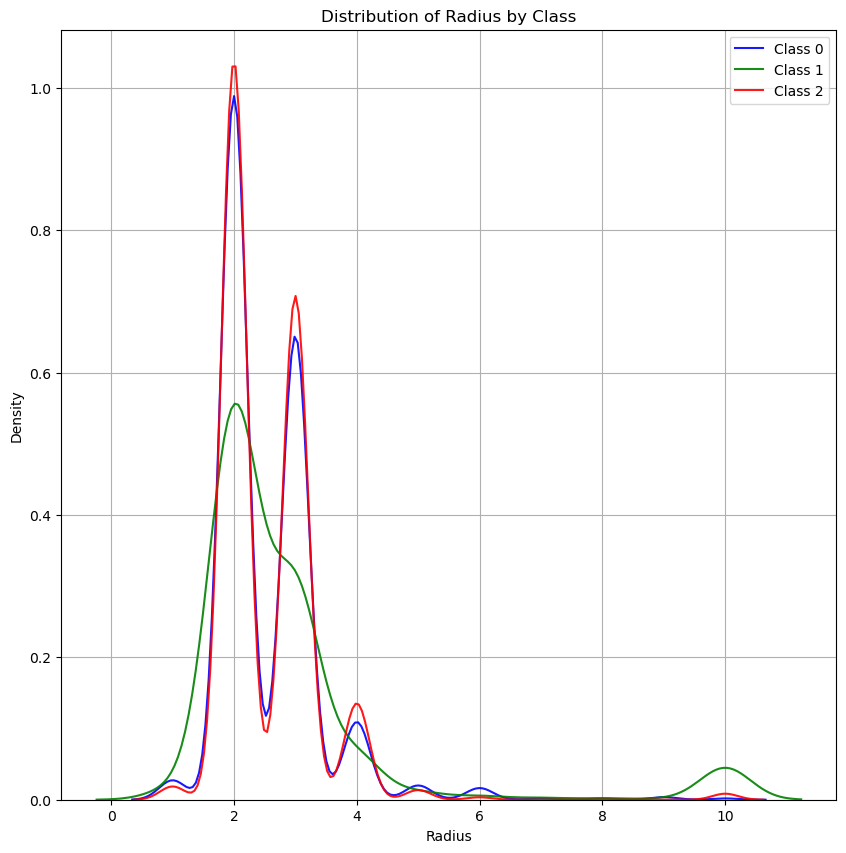

In [51]:
plt.figure(figsize=(10, 10))
sns.kdeplot(features_df[features_df['class'] == 0]['radius'], label='Class 0', fill=False, color='blue', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 1]['radius'], label='Class 1', fill=False, color='green', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 2]['radius'], label='Class 2', fill=False, color='red', alpha=0.9)

plt.title('Distribution of Radius by Class')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Distribution of Radius by Class', dpi=300, bbox_inches='tight')
plt.show()

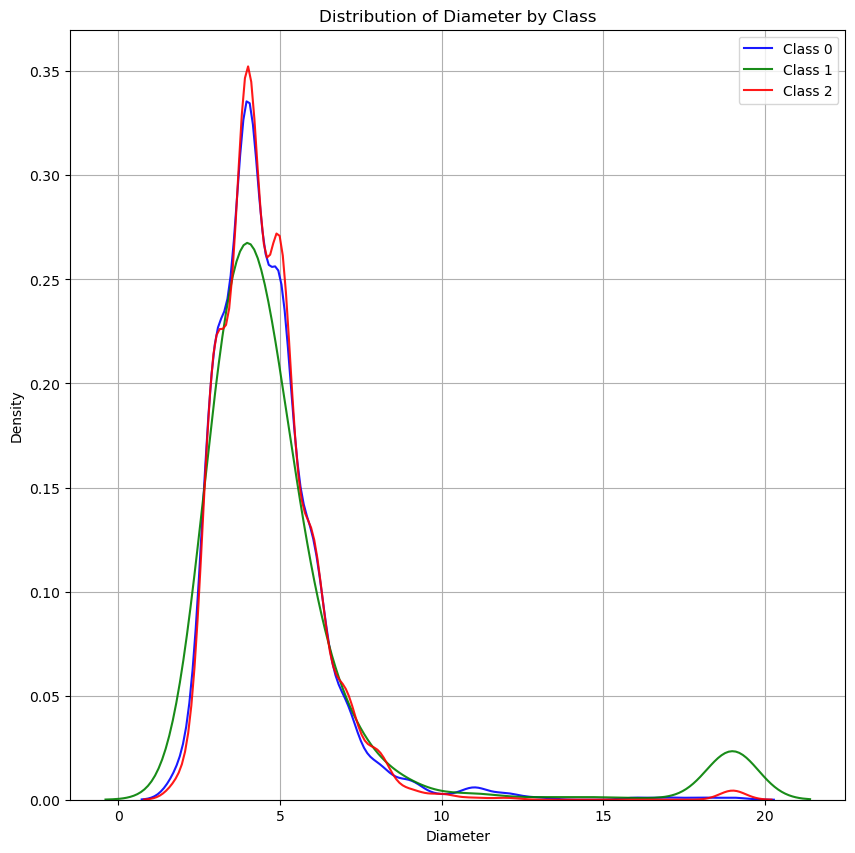

In [52]:
plt.figure(figsize=(10, 10))
sns.kdeplot(features_df[features_df['class'] == 0]['diameter'], label='Class 0', fill=False, color='blue', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 1]['diameter'], label='Class 1', fill=False, color='green', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 2]['diameter'], label='Class 2', fill=False, color='red', alpha=0.9)

plt.title('Distribution of Diameter by Class')
plt.xlabel('Diameter')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Distribution of Diameter by Class', dpi=300, bbox_inches='tight')
plt.show()

In [53]:
number_of_centers = []

for i in features_df['center']:
    # print(len(i))
    number_of_centers.append(len(i))

In [54]:
features_df['number_of_centers'] = number_of_centers
features_df.head()

,#nodes,#edges,diameter,center,radius,class,number_of_centers
0,20,58,4,[5],2,2,1
1,20,57,4,[4],2,0,1
2,20,58,4,[3],2,0,1
3,20,63,4,[2],2,2,1
4,20,64,3,"[1, 2, 4, 5, 8, 14, 15, 18]",2,2,8


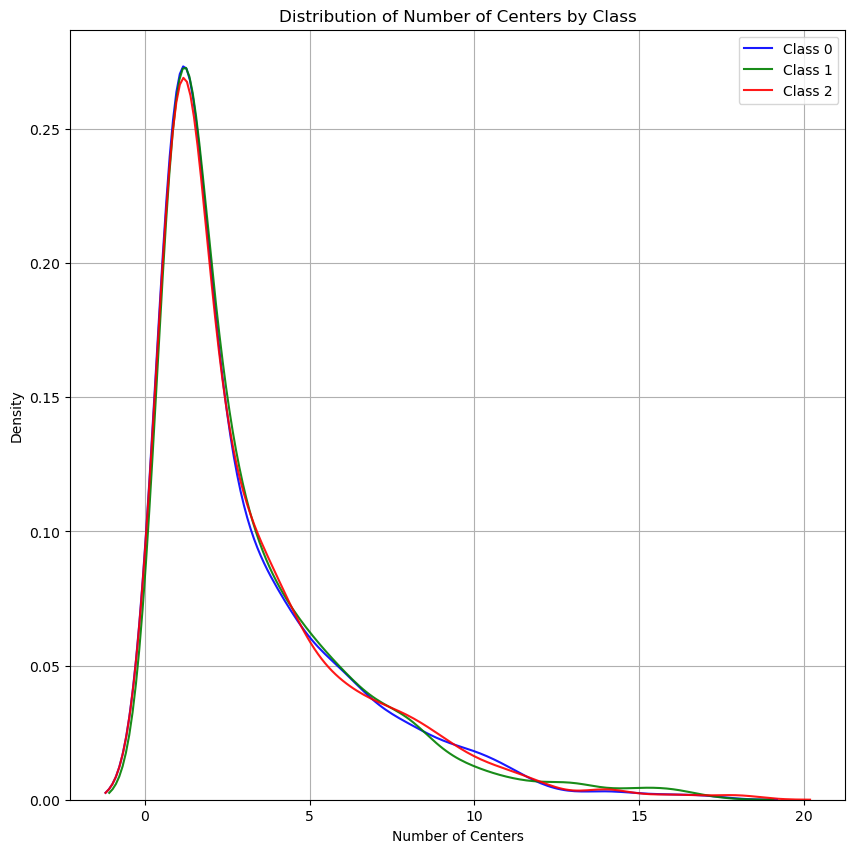

In [55]:
plt.figure(figsize=(10, 10))
sns.kdeplot(features_df[features_df['class'] == 0]['number_of_centers'], label='Class 0', fill=False, color='blue', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 1]['number_of_centers'], label='Class 1', fill=False, color='green', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 2]['number_of_centers'], label='Class 2', fill=False, color='red', alpha=0.9)

plt.title('Distribution of Number of Centers by Class')
plt.xlabel('Number of Centers')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Distribution of Number of Centers by Class', dpi=300, bbox_inches='tight')
plt.show()

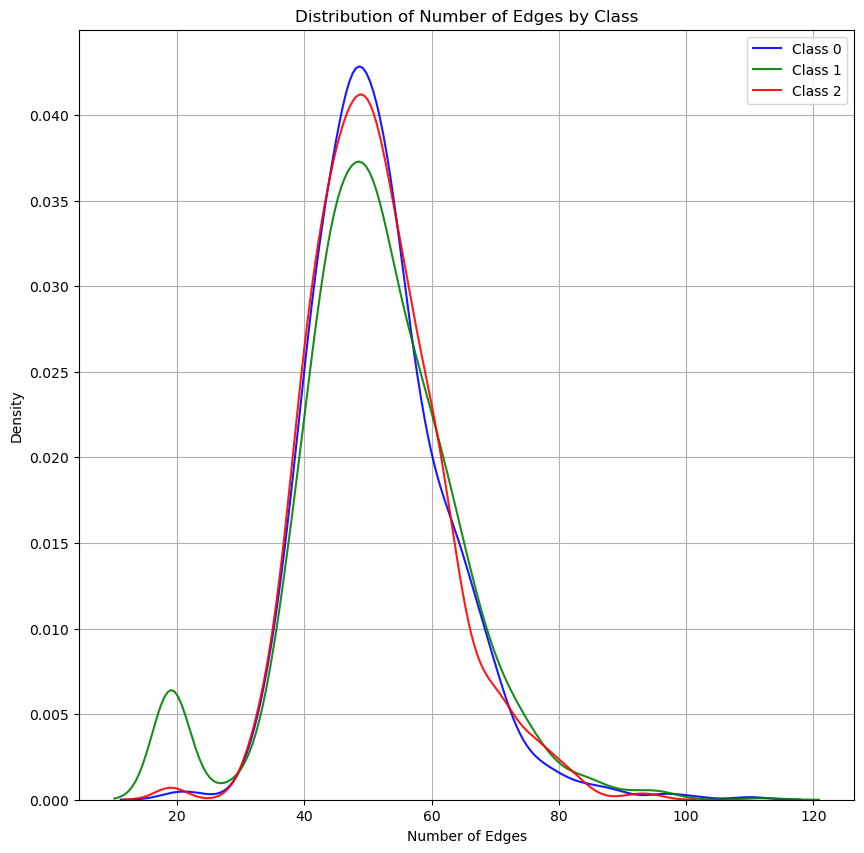

In [56]:
plt.figure(figsize=(10, 10))
sns.kdeplot(features_df[features_df['class'] == 0]['#edges'], label='Class 0', fill=False, color='blue', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 1]['#edges'], label='Class 1', fill=False, color='green', alpha=0.9)
sns.kdeplot(features_df[features_df['class'] == 2]['#edges'], label='Class 2', fill=False, color='red', alpha=0.9)

plt.title('Distribution of Number of Edges by Class')
plt.xlabel('Number of Edges')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Distribution of Number of Edges by Class', dpi=300, bbox_inches='tight')
plt.show()